In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:>

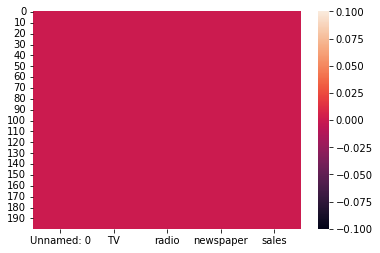

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

In [7]:
from scipy.stats import boxcox

In [8]:
df['newspaper']=boxcox(df['newspaper'],.5)

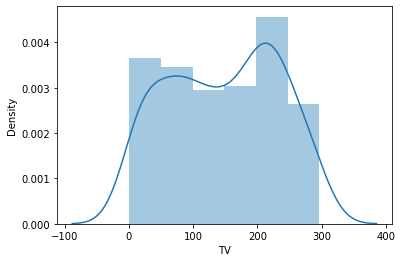

In [11]:
sns.distplot(df['TV'])
plt.show()

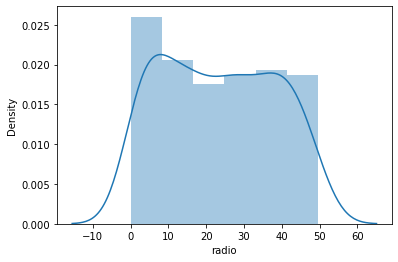

In [12]:
sns.distplot(df['radio'])
plt.show()

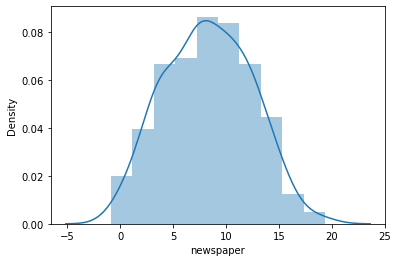

In [13]:
sns.distplot(df['newspaper'])
plt.show()

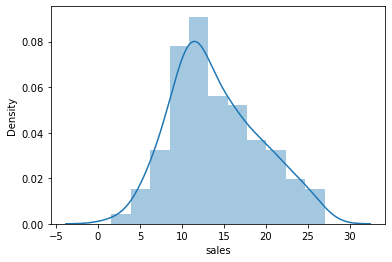

In [14]:
sns.distplot(df['sales'])
plt.show()

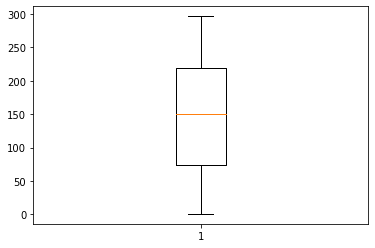

In [15]:
plt.boxplot(df['TV'])
plt.show()

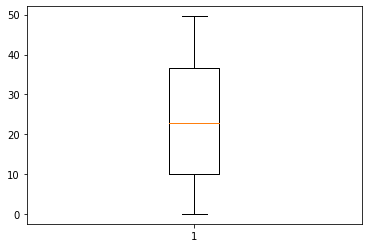

In [16]:
plt.boxplot(df['radio'])
plt.show()

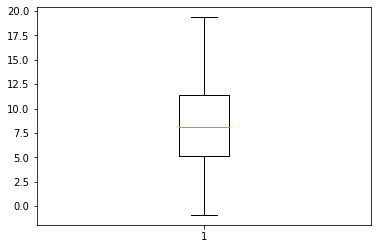

In [17]:
plt.boxplot(df['newspaper'])
plt.show()

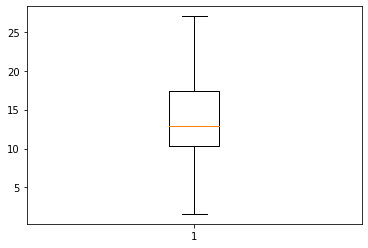

In [18]:
plt.boxplot(df['sales'])
plt.show()

In [21]:
from scipy.stats import zscore

In [22]:
z=np.abs(zscore(df))
z

,Unnamed: 0,TV,radio,newspaper,sales
0,1.723412,0.969852,0.981522,1.563095,1.552053
1,1.706091,1.197376,1.082808,0.774855,0.696046
2,1.688771,1.516155,1.528463,1.566049,0.907406
3,1.671450,0.052050,1.217855,1.233576,0.860330
4,1.654129,0.394182,0.841614,1.230360,0.215683
...,...,...,...,...,...
195,1.654129,1.270941,1.321031,0.700730,1.234053
196,1.671450,0.617035,1.240003,1.127935,0.830548
197,1.688771,0.349810,0.942899,1.283433,0.234898
198,1.706091,1.594565,1.265121,1.473445,2.205347


In [23]:
threashold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [24]:
corr=df.corr()
corr

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.147337,-0.051616
TV,0.017715,1.000000,0.054809,0.045976,0.782224
radio,-0.110680,0.054809,1.000000,0.313430,0.576223
newspaper,-0.147337,0.045976,0.313430,1.000000,0.204725
sales,-0.051616,0.782224,0.576223,0.204725,1.000000


<AxesSubplot:>

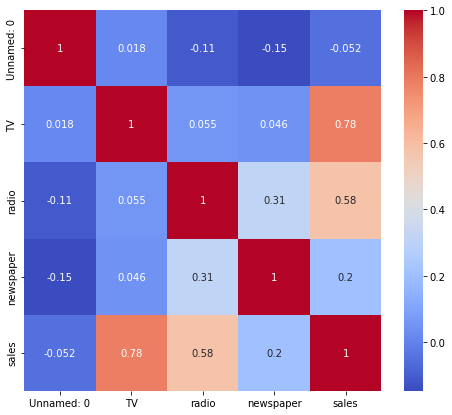

In [25]:
figure=plt.figure(figsize=(8,7))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [26]:
x=df.drop('sales',axis=1)
y=df['sales']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=22)

In [28]:
x_train.shape,x_test.shape

((160, 4), (40, 4))

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [30]:
lr=LinearRegression()

In [31]:
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
pred=lr.predict(x_test)

In [33]:
print('mean squared error',mean_squared_error(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('r2 score',r2_score(pred,y_test))

mean squared error 2.484347863300331
mean absolute error 1.1781839254818964
r2 score 0.9027944258298182


In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
score=cross_val_score(lr,x,y,cv=5)

In [36]:
print(score)
print(score.mean())
print(score.std())

[0.86722053 0.91597051 0.9297226  0.81385233 0.89583165]
0.8845195240759567
0.041118253386604825


In [37]:
from sklearn.linear_model import Ridge

In [38]:
rd=Ridge()

In [39]:
rd.fit(x_train,y_train)

Ridge()

In [40]:
pred=rd.predict(x_test)

In [41]:
print('mean squared error',mean_squared_error(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('r2 score',r2_score(pred,y_test))

mean squared error 2.4842813110091626
mean absolute error 1.1781789737942105
r2 score 0.9027948759437199


In [42]:
score=cross_val_score(rd,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.86722077 0.91597082 0.92972282 0.813861   0.89582814]
0.8845207085486673
0.04111515608904386
